# Lecture 21
- Linear Regression
- Clustering

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Last Class


<div class="alert alert-info">
  <strong>Inner Product</strong>

The *inner product* or *dot product* between two $n$-vectors $a$ and $b$ is the **scalar value** given by

$$ \mathbf{a} \cdot \mathbf{b} = \mathbf{a}^T \mathbf{b} = a_1 b_1 + a_2 b_2 + \ldots + a_n b_n $$
</div>

I.e., multiplication is carried out elementwise, and then the resulting values are added.

The **Covariance Matrix** is a table of the variances and covariances of the data in the following form 
\begin{align}
\mathbf{K_X} &= 
\begin{bmatrix}
\operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_1) & \operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_2)  \\
\operatorname{Cov}(\mathbf{X}_2, \mathbf{X}_1) & \operatorname{Cov}(\mathbf{X}_2, \mathbf{X}_2)  \\
\end{bmatrix} \\
&\\
&=
\begin{bmatrix}
\operatorname{Var}(\mathbf{X}_1) & \operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_2)  \\
\operatorname{Cov}(\mathbf{X}_1, \mathbf{X}_2) & \operatorname{Var}(\mathbf{X}_2)  \\
\end{bmatrix} 
\end{align}

# (Pearson's) Correlation Coefficient, $r$

<div class="alert alert-info">
  <strong>Pearson's Correlation Coefficient</strong>

For random variables $X$ and $Y$, the **Pearson's correlation coefficient** (or simply the **correlation coefficient**) is

\begin{align*}
\rho_{XY} = \frac{\operatorname{cov}(X,Y)}{\sqrt{\text{var}(X)}\sqrt{\text{var}(Y)}} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}
\end{align*}

For vectors of feature data $\mathbf{x}$ and $\mathbf{y}$ (samples), the **(Pearson's) correlation coefficient** is 

\begin{align*}
r_{xy} = \frac{\hat{\operatorname{cov}}(\mathbf{x},\mathbf{y})}{\hat{\sigma}_x \hat{\sigma}_y}
\end{align*}

where $\hat{\operatorname{cov}}(\mathbf{x},\mathbf{y})$ is the sample covariance and $\hat{\sigma}_x$ and $\hat{\sigma}_y$ are the square-roots of the corresponding sample variances.    
</div>

## Correlation Examples

![Correlation Examples](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)

Looking at these examples, correlation gives a measure of:
* how closely the data fits a straight line
* how much an observation of one data feature can be used to predict the other data feature
* the correlation coefficient is only able to characterize **linear relationships** only

# Today's Lecture

- Linear Regression - moving beyond correlations
- Clustering using K-means

# Linear Regression -- Part 1

To further investigate the first observation, we find the best fitting line to the data; the one that **minimizes the mean-square error**. This is called **<font color='magenta'> linear regression </font>**.

We are not ready to understand the math behind linear regression yet, but we can call a function to get the best slope and y-intercept for a given data set:

In [2]:
?stats.linregress

**<font color='blue'> Example 1 </font>**

In [30]:
df=pd.read_csv('firearms-combined.csv')

In [31]:
x = df[['Total Laws 2014', 'RATE-2014']].to_numpy()
x_mean = np.mean(x, axis=0)
x_median = np.median(x, axis=0)

Text(0, 0.5, 'Firearms Mortality Rate in 2014')

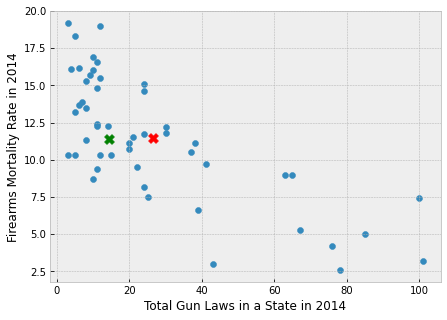

In [32]:
plt.figure(figsize=(7,5))

plt.scatter(x[:,0],x[:,1], label='Data')
plt.scatter(x_mean[0], x_mean[1], color='red', marker='X', s=100, label='Average')
plt.scatter(x_median[0], x_median[1], color='green', marker='X', s=100, label='Median')
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014')




In [33]:
stats.linregress(x[:,0], x[:,1]) # x_1 = slope*x_0 + intercept

LinregressResult(slope=-0.11791995336903911, intercept=14.562520365212155, rvalue=-0.7428741668669697, pvalue=6.534702577675003e-10, stderr=0.015337596076549125, intercept_stderr=0.5678971485642228)

In [34]:
stats.linregress(x) # this also works for 2 dimensional arrays

LinregressResult(slope=-0.11791995336903911, intercept=14.562520365212155, rvalue=-0.7428741668669697, pvalue=6.534702577675003e-10, stderr=0.015337596076549125, intercept_stderr=0.5678971485642228)

In [35]:
m, b, rho, p, _ = stats.linregress(x)

In [36]:
print('Slope = ',m)
print('Intercept = ', b)

Slope =  -0.11791995336903911
Intercept =  14.562520365212155


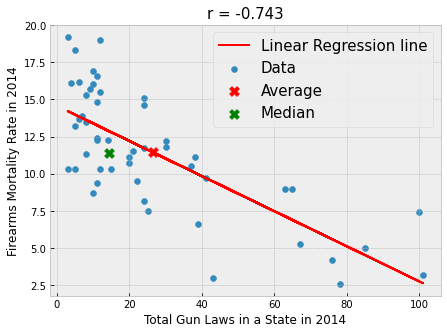

In [16]:
plt.figure(figsize=(7,5))

plt.scatter(x[:,0],x[:,1], label='Data')
plt.scatter(x_mean[0], x_mean[1], color='red', marker='X', s=100, label='Average')
plt.scatter(x_median[0], x_median[1], color='green', marker='X', s=100, label='Median')
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014')

plt.plot(x[:,0], m*x[:,0]+b, 'r', label = 'Linear Regression line')
plt.title('r = '+ str(np.round(rho, 3)), fontsize = 15)
plt.legend(fontsize = 15);


**<font color='blue'> Example 2 </font>**: from the **Behavioral Risk Factor Surveillance System (BRFSS)**.

In [17]:
import pickle

file=open('brfss17.pickle','rb')
df2=pickle.load(file)
file.close()

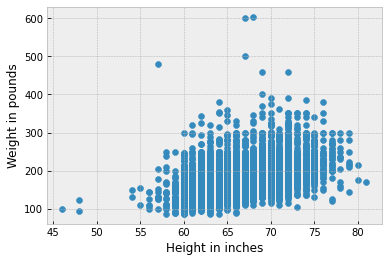

In [18]:
plt.scatter(df2['HEIGHT'], df2['WEIGHT2'])
plt.xlabel('Height in inches')
plt.ylabel('Weight in pounds');




In [19]:
x2 = df2['HEIGHT'].to_numpy()
y2 = df2['WEIGHT2'].to_numpy()

x2.shape, y2.shape

((5000,), (5000,))

In [21]:
np.cov(x2,y2)/(np.std(x2, ddof=1)*np.std(y2, ddof=1))

array([[ 0.09116844,  0.46004425],
       [ 0.46004425, 10.96870813]])

In [24]:
m2, b2, rho2, p2, _ = stats.linregress(x2, y2)

print('Slope = ',m)
print('Intercept = ', b)
print('Correlation Coefficient = ', rho2)

Slope =  5.046091133743839
Intercept =  -157.52237772092406
Correlation Coefficient =  0.46004425278772415


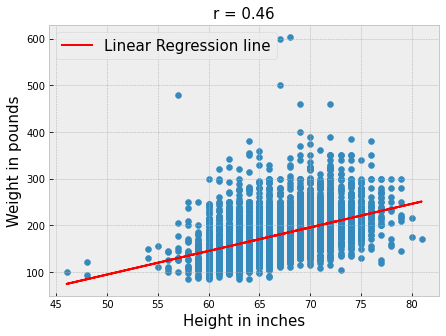

In [27]:
plt.figure(figsize=(7,5))
plt.scatter(x2, y2)
plt.xlabel('Height in inches', fontsize=15)
plt.ylabel('Weight in pounds', fontsize=15)

plt.plot(x2, m2*x2+b2, 'r', label = 'Linear Regression line')
plt.title('r = '+ str(np.round(rho2, 3)), fontsize = 15)
plt.legend(fontsize = 15);


### Observations

The correlation coefficient does **not** give a measure of:

1. whether the features are independent
2. how much variance remains if we use a feature to predict the other feature

# Coefficient of Determination, $r^2$

<div class="alert alert-info">
  <strong>Coefficient of Determination</strong>
    
The **coefficient of determination**, denoted $R^2$ or $r^2$ and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

$$r^2 = 1 - \frac{\text{Unexplained Variation}}{\text{Total Variation}}$$

and $ 0 \leq r^2 \leq 1$.

* $r^2$ is the square of the correlation coefficient $r$.
    
</div>

In [37]:
m, b, rho, p, _ = stats.linregress(x)

print('Slope = ',m)
print('Intercept = ', b)
print('Correlation Coefficient = ', rho)
print('Coefficient of Determination = ', rho**2)

Slope =  -0.11791995336903911
Intercept =  14.562520365212155
Correlation Coefficient =  -0.7428741668669697
Coefficient of Determination =  0.5518620277982944


In [38]:
m2, b2, rho2, p2, _ = stats.linregress(x2, y2)

print('Slope = ',m2)
print('Intercept = ', b2)
print('Correlation Coefficient = ', rho2)
print('Coefficient of Determination = ', rho2**2)

Slope =  5.046091133743839
Intercept =  -157.52237772092406
Correlation Coefficient =  0.46004425278772415
Coefficient of Determination =  0.21164071452301544


# <font color='red'> Correlation is not causation! </font>

In [39]:
from IPython.display import Image, Video, HTML

In [40]:
Video('cat.mp4')

Spurious Correlations
https://www.tylervigen.com/spurious-correlations

In [41]:
HTML('fishing-marriage.svg')

In [43]:
HTML('spelling-spiders.svg')

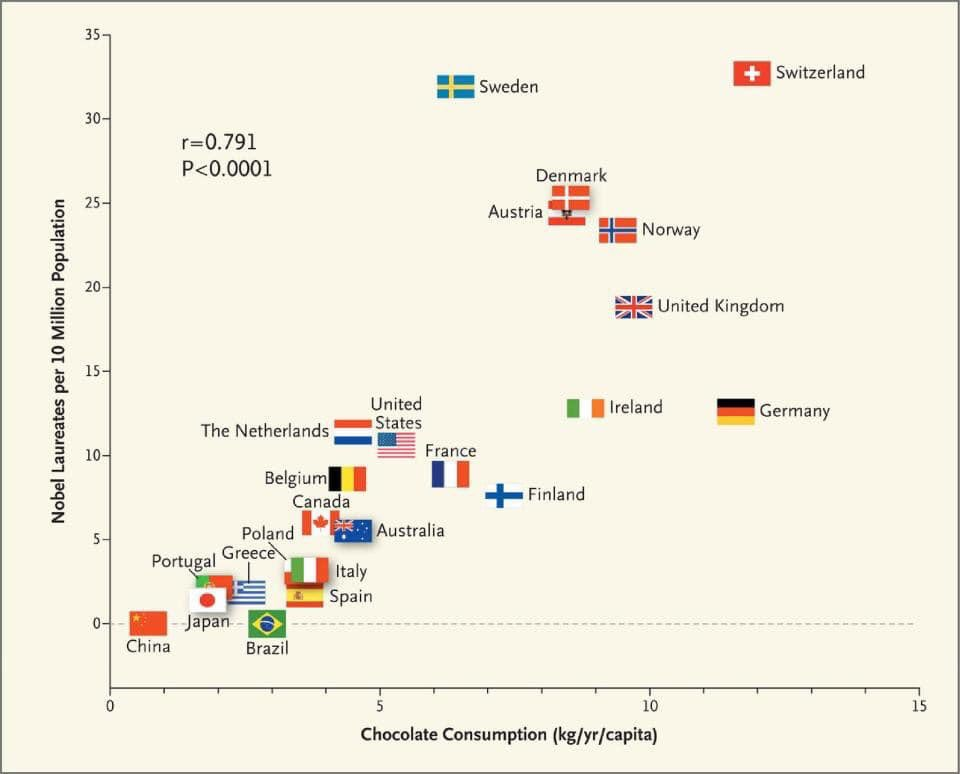

In [44]:
Image('chocolate-nobel.jpeg')

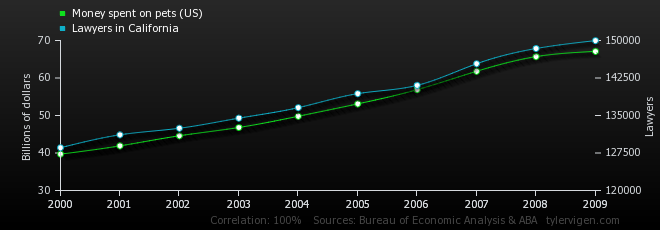

In [45]:
Image('pets-lawyers.png')

In [46]:
pets=[39.7,41.9, 44.6, 46.8, 49.8, 53.1, 56.9, 61.8, 65.7, 67.1]
lawyers=[128553, 131139, 132452, 134468, 136571, 139371, 141030, 145355, 148399, 149982]

In [47]:
stats.linregress(pets,lawyers)

LinregressResult(slope=751.0366939629847, intercept=99122.32476039219, rvalue=0.9983862040448527, pvalue=2.961633157473725e-11, stderr=15.103639606842094, intercept_stderr=808.9476097973932)

___

# More Examples

**Combined Cycle Power Plant Data Set** obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant).

The dataset contains 9568 data samples collected from a Combined Cycle Power Plant (CCPP) over 6 years (2006-2011), when the power plant was set to work with full load. 

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

The *goal* is to predict the net hourly electrical energy output (PE) of the plant using a different set of features (or variables), in particular, hourly average of:

* Ambient Temperature (AT),
* Ambient Pressure (AP),
* Relative Humidity (RH), and 
* Exhaust Vacuum (V).

In [48]:
Data = pd.read_csv('PowerPlant.csv')
Data

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [49]:
# Observed ambient variables:
X1 = Data['AT'].to_numpy() # hourly average Ambient Temperature (AT)
X2 = Data['V'].to_numpy()  # hourly average Ambient Pressure (AP)
X3 = Data['AP'].to_numpy() # hourly average Relative Humidity (RH)
X4 = Data['RH'].to_numpy() # hourly average Exhaust Vacuum (V)
X_all = Data[['AT','V','AP','RH']].to_numpy()
X_labels=Data.columns[:-1]

# Variable to be predicted
Y = Data['PE'].to_numpy()  # net hourly electrical energy output (PE)

### Ambient Temperature

In [50]:
reg1 = stats.linregress(X1, Y)

reg1

LinregressResult(slope=-2.171319958517793, intercept=497.03411989276674, rvalue=-0.948128470416759, pvalue=0.0, stderr=0.0074432871256579864, intercept_stderr=0.1564338214209017)

In [51]:
Yhat1 = reg1[0]*X1 + reg1[1] # prediction of Y

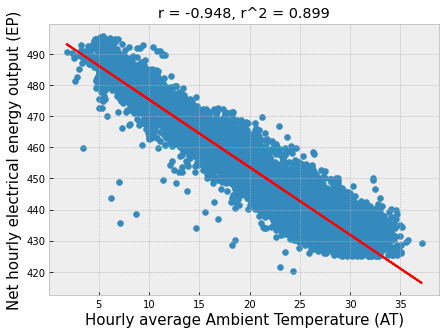

In [58]:
plt.figure(figsize=(7,5))

plt.scatter(X1, Y)
plt.plot(X1, Yhat1, 'r')
plt.xlabel('Hourly average Ambient Temperature (AT)', fontsize=15)
plt.ylabel('Net hourly electrical energy output (EP)', fontsize=15)
plt.title('r = '+ str(np.round(reg1[2],3)) + ', r^2 = '+str(np.round(reg1[2]**2,3)));


In [60]:
np.corrcoef(X1, Y)

array([[ 1.        , -0.94812847],
       [-0.94812847,  1.        ]])

Without the ambient temperature information, the variance in the energy output is 

In [61]:
np.var(Y)

291.2518749372025

After using the linear regression prediction, the variance of the prediction is:

In [62]:
np.var(Yhat1)

261.82017292610897

After using the linear regression prediction, the remaining variance in the prediction is:

In [63]:
np.var(Y-Yhat1)

29.431702011093517

Finally, the proportion of the original variance that is explained by the predictor is

In [64]:
1 - np.var(Y-Yhat1)/np.var(Y)

0.8989475964148236

The $r^2$ value is 

In [65]:
reg1[2]**2

0.898947596414823

### Ambient Pressure

Let's check the variances before and after prediction:

Note that the residual variance is 

The coefficient of determination is:

### Relative Humidity

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X3,Y)
plt.plot(X3,Yhat3,'r')
plt.xlabel('Hourly average Relative Humidity (RH)',fontsize=15)
plt.ylabel('Net hourly electrical energy output (EP)',fontsize=15)
plt.title('r = '+str(np.round(reg3[2],3))+', $r^2$ = '+str(np.round(reg3[2]**2,3)),fontsize=15);

The remaining variance is not that much smaller than the original variance

The coefficient of determination is:

### Exhaust Vacuum

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X4,Y)
plt.plot(X4,Yhat4,'r')
plt.ylabel('Hourly average Exhaust Vacuum (V)',fontsize=15)
plt.xlabel('Net hourly electrical energy output (EP)',fontsize=15)
plt.title('r = '+str(np.round(reg4[2],3))+', $r^2$ = '+str(np.round(reg4[2]**2,3)),fontsize=15);

The coefficient of determination is:

___

# Testing Correlation and Nonlinear Relationships

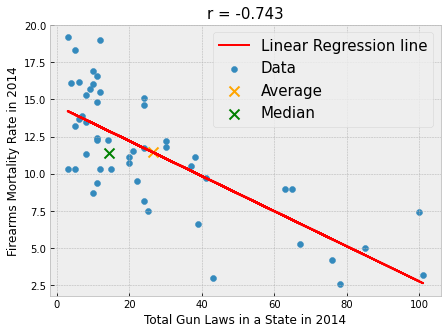

In [66]:
df = pd.read_csv('firearms-combined.csv')
x = df[['Total Laws 2014','RATE-2014']].to_numpy()
x_mean = np.mean(x, axis=0)
x_median = np.median(x, axis=0)

m,b,r,p,s=stats.linregress(x)

plt.figure(figsize=(7,5))
plt.scatter(x[:,0],x[:,1], label='Data')
plt.scatter(x_mean[0],x_mean[1],color='orange',s=100,marker='x',label='Average')
plt.scatter(x_median[0],x_median[1],color='green',s=100,marker='x',label='Median')
plt.xlabel('Total Gun Laws in a State in 2014')
plt.ylabel('Firearms Mortality Rate in 2014')

plt.plot(x[:,0], m*x[:,0]+b,'r', label='Linear Regression line')
plt.title('r = '+str(np.round(r,3)), fontsize=15)
plt.legend(fontsize=15);

```stats.linregress``` returns a $p$-value:

In [67]:
p

6.534702577675003e-10

* How can we generate  $p$-value using resampling?

The correlation is non-zero because the features **vary together**.

* How can we draw data with the same distribution for each feature, but without them varying together?

Just bootstrap sample independently from each feature! That should give us uncorrelated data:

In [68]:
import numpy.random as npr

numsims=10_000
total=0

for sim in range(numsims):
    samplex = npr.choice(x[:,0], size = x.shape[0])
    sampley = npr.choice(x[:,1], size = x.shape[0])
    samplereg = stats.linregress(samplex, sampley)
    if samplereg[2] <= r: # <= because r is negative
        total+=1
    
    
print('Average correlation is',total/numsims)

Average correlation is 0.0


So that is how to generate uncorrelated data, which is our null hypothesis $H_0$.

To test if the observed correlation is significant, we find the probability that we have a correlation that is at least as large under $H_0$.

We use a one-sided test with a 1% tolerance:

In [70]:
numsims=10_000
count=0
for sim in range(numsims):
    samplex = npr.choice(x[:,0], size = x.shape[0])
    sampley = npr.choice(x[:,1], size = x.shape[0])
    samplereg = stats.linregress(samplex, sampley)
    if abs(samplereg[2]) >= abs(r): 
        total+=1
    
print('Probability of observing a correlation this strong is =~',count/numsims)

Probability of observing a correlation this strong is =~ 0.0


**Conclusion:** 

Because the probability of drawing a correlation is < 0.01, we reject the possibility that the data is uncorrelated.

Suppose we had a much smaller data set:

In [71]:
x2 = x[10:18, :]

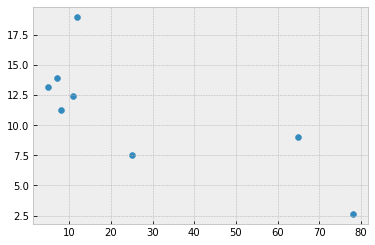

In [72]:
plt.scatter(x2[:,0], x2[:,1]);

In [74]:
m2, b2, r2, p2, _ = stats.linregress(x2)

In [75]:
r2, p2

(-0.7675578490651682, 0.026177754063974934)

In [78]:
# 2-sided p-value

numsims=10_000
count=0
for sim in range(numsims):
    samplex = npr.choice(x2[:,0], size = x2.shape[0])
    sampley = npr.choice(x2[:,1], size = x2.shape[0])
    samplereg = stats.linregress(samplex, sampley)
    if abs(samplereg[2]) >= abs(r2): 
        count+=1
    
print('Probability of observing a correlation this strong is =~',count/numsims)

Probability of observing a correlation this strong is =~ 0.029


```stats.linregress``` actually does a 2-sided test:

In [79]:
?stats.linregress

___

## Let's look at some COVID-19 data:

Source: The COVID Tracking Project, https://covidtracking.com/data

* Only contains data starting between Jan 7, 2020 and March 7, 2021.

In [80]:
df=pd.read_csv('all-states-history.csv')
df

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20775,2020-01-17,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20776,2020-01-16,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20777,2020-01-15,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20778,2020-01-14,WA,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [87]:
FL = df[df['state']=='FL']
FL

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
10,2021-03-07,FL,32266.0,NaN,66,NaN,82237.0,82237.0,3307.0,92,...,22339182.0,64599,1054711.0,NaN,995580.0,NaN,11248247.0,23190,19482607.0,52132
66,2021-03-06,FL,32200.0,NaN,107,NaN,82145.0,82145.0,3352.0,243,...,22274583.0,87820,1054711.0,NaN,995580.0,NaN,11225057.0,27869,19430475.0,59303
122,2021-03-05,FL,32093.0,NaN,138,NaN,81902.0,81902.0,3419.0,302,...,22186763.0,106925,1054711.0,NaN,995580.0,NaN,11197188.0,32786,19371172.0,77877
178,2021-03-04,FL,31955.0,NaN,126,NaN,81600.0,81600.0,3566.0,322,...,22079838.0,104245,1024780.0,NaN,970437.0,NaN,11164402.0,32447,19293295.0,74448
234,2021-03-03,FL,31829.0,NaN,133,NaN,81278.0,81278.0,3596.0,306,...,21975593.0,73990,1024780.0,NaN,970437.0,NaN,11131955.0,23109,19218847.0,51529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20735,2020-02-02,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,4.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20739,2020-02-01,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,4.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20743,2020-01-31,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,4.0,3,NaN,NaN,NaN,NaN,NaN,0,NaN,0
20747,2020-01-30,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,0,...,1.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [88]:
FL = FL[::-1] # invert rows
FL = FL.reset_index() # resetting the indexing of the rows
FL

,index,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,20751,2020-01-29,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,20747,2020-01-30,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,...,1.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,20743,2020-01-31,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,...,4.0,3,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,20739,2020-02-01,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,...,4.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,20735,2020-02-02,FL,NaN,NaN,0,NaN,NaN,NaN,NaN,...,4.0,0,NaN,NaN,NaN,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,234,2021-03-03,FL,31829.0,NaN,133,NaN,81278.0,81278.0,3596.0,...,21975593.0,73990,1024780.0,NaN,970437.0,NaN,11131955.0,23109,19218847.0,51529
400,178,2021-03-04,FL,31955.0,NaN,126,NaN,81600.0,81600.0,3566.0,...,22079838.0,104245,1024780.0,NaN,970437.0,NaN,11164402.0,32447,19293295.0,74448
401,122,2021-03-05,FL,32093.0,NaN,138,NaN,81902.0,81902.0,3419.0,...,22186763.0,106925,1054711.0,NaN,995580.0,NaN,11197188.0,32786,19371172.0,77877
402,66,2021-03-06,FL,32200.0,NaN,107,NaN,82145.0,82145.0,3352.0,...,22274583.0,87820,1054711.0,NaN,995580.0,NaN,11225057.0,27869,19430475.0,59303


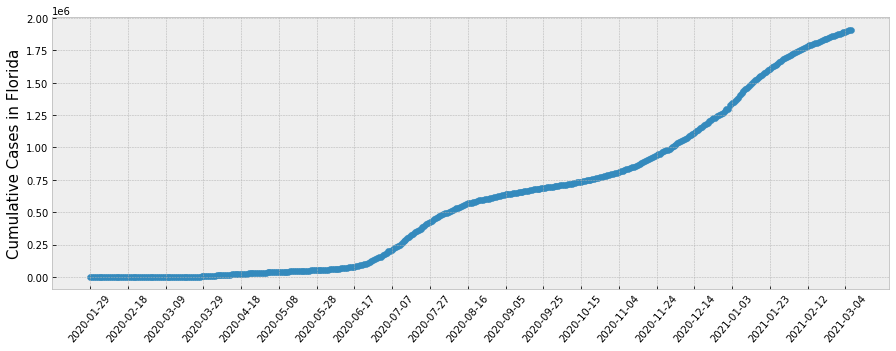

In [89]:
plt.figure(figsize=(15,5))


y = FL['positive'].to_numpy()
N = len(y)
x = range(N)

plt.scatter(x,y)
plt.xticks(np.arange(0,N,20), FL['date'][np.arange(0,N,20)], rotation=50, fontsize = 10)
plt.ylabel('Cumulative Cases in Florida', fontsize=15);

**Two and a half years ago**, in March 2020, we moved all courses to an online setting. Let's take a look at data from March 2020:

In [90]:
FL['date'][35], FL['date'][60]

('2020-03-04', '2020-03-29')

In [91]:
FL['positive'][35], FL['positive'][60]

(3.0, 3884.0)

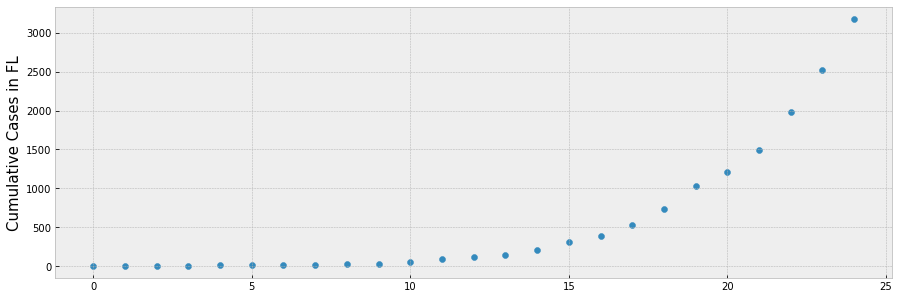

In [92]:
plt.figure(figsize=(15,5))

y=FL['positive'][35:60].to_numpy()
N = len(y)
x = np.array(range(N))


plt.scatter(x,y)
plt.ylabel('Cumulative Cases in FL', fontsize=15);

Do you think this data is *linearly* correlated?

In [93]:
m, b, r, _, _ = stats.linregress(x,y)

In [94]:
print('Correlation coefficient is', r)

Correlation coefficient is 0.8105252841479343


In [95]:
r**2

0.6569512362430897

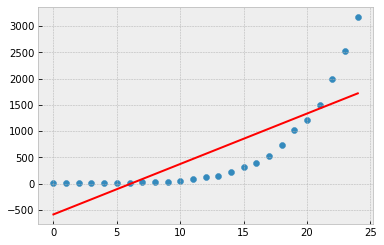

In [97]:
plt.scatter(x,y)
plt.plot(x, m*x+b, 'r');

**Observation:** The relationship is **not linear**!

The growth seems **exponential**.

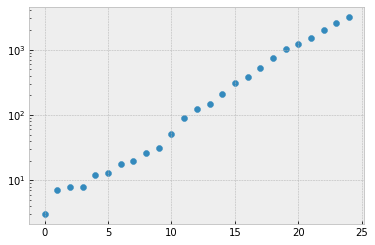

In [99]:
plt.scatter(x,y)
plt.yscale('log');

The growth is only exponential once there is a sufficient population of infected people who are being tested.

* So, how to use **linear regression** with this exponential growth?

Let's compute the regression to the log of the data:

In [100]:
ylog = np.log(y) # np.log() is the natural base log of y

In [102]:
m_log, b_log, r_log, _, _ = stats.linregress(x, ylog)

print(r_log)

0.9963361369556721


Now $r$> 0.99. This data is highly correlated!

* How do we convert this back to our original $y$ value?

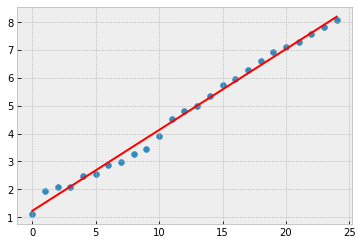

In [104]:
plt.scatter(x, ylog)
plt.plot(x, x*m_log+b_log, 'r');

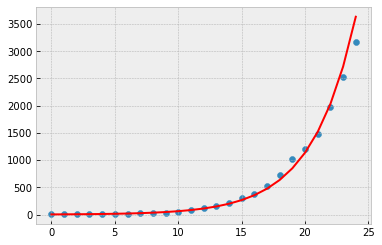

In [105]:
plt.scatter(x, y)
plt.plot(x, np.exp(x*m_log+b_log), 'r');

* What is the doubling rate? 

For exponential growth, the number of days between doublings is a constant. Let's compute that on the virtual whiteboard.

If this rate of growth continues, on what day will we have 100,000 cases?

35 days after March 4th = April 8th

Let's make predictions for the next 5 days

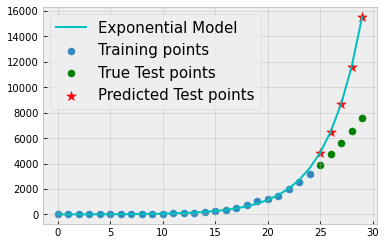

In [108]:
x_all = np.array(range(0, len(x)+5)) # x-values for the current 25 days + 5 predictions

x_future = np.array(range(len(x),len(x)+5)) # future x-values as a numpy array
y_future = FL['positive'][60:60+5] # extracting the true values for the cumulative positive cases
y_future_pred = np.exp(m_log*x_future + b_log)

plt.scatter(x, y, s=50, label='Training points')
plt.plot(x_all, np.exp(m_log*x_all + b_log),'c',label='Exponential Model')
plt.scatter(x_future, y_future, s=50, color='g', label='True Test points')
plt.scatter(x_future, y_future_pred, marker='*',color='r',s=100, label='Predicted Test points')
plt.legend(fontsize=15);

* What is the variability of the fitted line? Let's compute the 95% CI:

In [110]:
data = np.vstack((x, ylog)).T

data.shape

(25, 2)

In [111]:
data

array([[ 0.        ,  1.09861229],
       [ 1.        ,  1.94591015],
       [ 2.        ,  2.07944154],
       [ 3.        ,  2.07944154],
       [ 4.        ,  2.48490665],
       [ 5.        ,  2.56494936],
       [ 6.        ,  2.89037176],
       [ 7.        ,  2.99573227],
       [ 8.        ,  3.25809654],
       [ 9.        ,  3.4339872 ],
       [10.        ,  3.93182563],
       [11.        ,  4.51085951],
       [12.        ,  4.80402104],
       [13.        ,  5.00394631],
       [14.        ,  5.35185813],
       [15.        ,  5.7365723 ],
       [16.        ,  5.95583737],
       [17.        ,  6.26909628],
       [18.        ,  6.59441346],
       [19.        ,  6.93634274],
       [20.        ,  7.09423485],
       [21.        ,  7.30518822],
       [22.        ,  7.59337419],
       [23.        ,  7.83201418],
       [24.        ,  8.06432196]])

In [112]:
numsims=10_000
count=0
slope_sample=[]
intercept_sample=[]
for sim in range(numsims):
    # bootstrap sampling
    idx = np.random.choice(range(len(data)), size=len(data))
    samplex = data[idx, 0]
    sampley = data[idx, 1]
    
    samplereg = stats.linregress(samplex, sampley)
    slope_sample += [samplereg[0]]
    intercept_sample += [samplereg[1]]
    
    

In [114]:
np.vstack((samplex, sampley)).T

array([[ 7.        ,  2.99573227],
       [20.        ,  7.09423485],
       [ 6.        ,  2.89037176],
       [20.        ,  7.09423485],
       [ 8.        ,  3.25809654],
       [ 9.        ,  3.4339872 ],
       [15.        ,  5.7365723 ],
       [14.        ,  5.35185813],
       [ 3.        ,  2.07944154],
       [13.        ,  5.00394631],
       [10.        ,  3.93182563],
       [ 4.        ,  2.48490665],
       [ 0.        ,  1.09861229],
       [16.        ,  5.95583737],
       [24.        ,  8.06432196],
       [ 2.        ,  2.07944154],
       [ 3.        ,  2.07944154],
       [17.        ,  6.26909628],
       [12.        ,  4.80402104],
       [ 5.        ,  2.56494936],
       [ 8.        ,  3.25809654],
       [17.        ,  6.26909628],
       [22.        ,  7.59337419],
       [ 0.        ,  1.09861229],
       [ 7.        ,  2.99573227]])

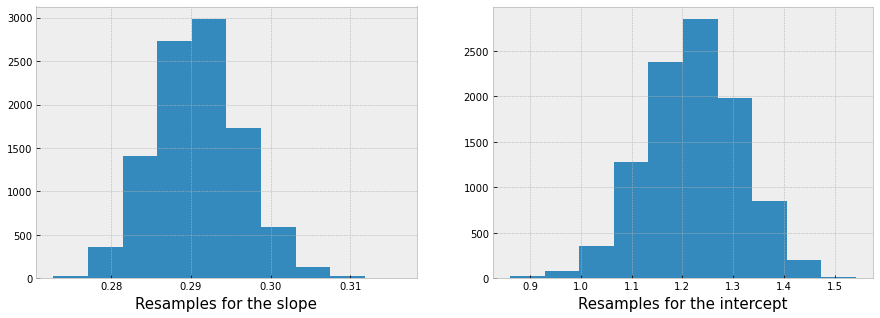

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(slope_sample)
plt.xlabel('Resamples for the slope',size=15)

plt.subplot(122)
plt.hist(intercept_sample)
plt.xlabel('Resamples for the intercept',size=15);

In [116]:
def confidence_interval(data, C):
    ''' Find the C% confidence interval given data'''
    pbar=1-C/100
    datalen=len(data)
    
    lower_bound=int(datalen*pbar/2)
    upper_bound=datalen-lower_bound-1
    
    data_sorted=np.sort(data)
    
    print(C,"% confidence interval:[",\
          data_sorted[lower_bound],",",data_sorted[upper_bound],"]")

In [117]:
confidence_interval(slope_sample, 95)

95 % confidence interval:[ 0.28054767407320275 , 0.3020534310396435 ]


In [118]:
confidence_interval(intercept_sample, 95)

95 % confidence interval:[ 1.037056863007395 , 1.4003063203765982 ]


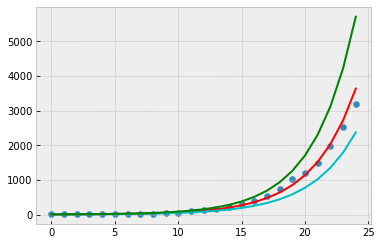

In [123]:
plt.scatter(x,y)
plt.plot(x, np.exp(m_log*x+b_log), 'r');

plt.plot(x, np.exp(0.28054767407320275*x + 1.037056863007395), 'c')
plt.plot(x, np.exp(0.3020534310396435*x + 1.4003063203765982), 'g');


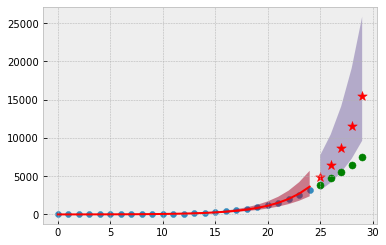

In [129]:
plt.scatter(x,y)
plt.plot(x, np.exp(m_log*x+b_log), 'r');

plt.fill_between(x, np.exp(0.28054767407320275*x + 1.037056863007395),
                 np.exp(0.3020534310396435*x + 1.4003063203765982), alpha = 0.5);

plt.fill_between(x_future, np.exp(0.28054767407320275*x_future + 1.037056863007395),
                 np.exp(0.3020534310396435*x_future + 1.4003063203765982), alpha = 0.5);
plt.scatter(x_future, y_future, s=50, color='g', label='True Test points')
plt.scatter(x_future, y_future_pred, marker='*',color='r',s=100, label='Predicted Test points');


Later in the course, we will learn how to model this data by performing **feature engineering**.

___

# Norms, Angles, Distances

Take a look at supplementary notebook and video Lecture21-supp

## Euclidean Norm

<div class="alert alert-info">
  <strong>Euclidean Norm</strong>

The **Euclidean norm** of an $n$-vector $\mathbf{x}$, denoted $\Vert \mathbf{x}\Vert$, is the square-root of the inner product of the vector with itself, i.e. 

\begin{align*}
\Vert\mathbf{x}\Vert = \sqrt{\mathbf{x}^T\mathbf{x}} = \sqrt{x_1^2+x_2^2+\cdots+x_n^2}=\left(x_1^2+x_2^2+\cdots+x_n^2\right)^{1/2}
\end{align*}
</div>

## Euclidean Distance

<div class="alert alert-info">
  <strong>Euclidean Distance</strong>

We already know how to compute **Euclidean distance** between vectors, $\mathbf{x}$ and $\mathbf{y}$, in an Euclidean geometry:

$$d(\mathbf{x},\mathbf{y}) = \Vert\mathbf{x}-\mathbf{y}\Vert$$

The Euclidean distance corresponds to the shortest line that connects the two vectors $\mathbf{x}$ and $\mathbf{y}$.
</div>

# K-Means Clustering

Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

We can consider the task of clustering a collection of vectors into groups or clusters of vectors that are close to each other, as measured by the distance between pairs of them.

How many groups would you partition the following data into?

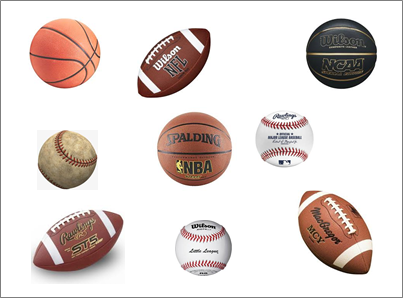

In [3]:
from IPython.display import Image
Image('figures/ClusteringExample.png', width=500)

We can describe each image in a $d$ numerical features, and so each figure (called sample) will be a $d$-vector.

And now, we want to cluster all $N$ images into sets of groups.

Clustering is an **unsupervised** learning algorithm. It's unsupervised because we do not have *ground truth* cluster labels.

## Clustering Applications

* Topic discovery
* Patient clustering
* Customer market segmentation
* Daily energy user patterns
* Image Compression
* Word clustering
* Document clustering 
* etc.

![scikit-learn logo](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

The ```scikit-learn``` library has many useful methods for machine learning, including clustering.

In [ ]:
X, y = make_blobs(n_samples = 1500, centers = 5)
plt.scatter(X[:,0],X[:,1]);

There are many ways to perform clustering. For the data set above, for example, we may pose the problem as: the data distribution is a sum of Gaussian distributions - called a *Gaussian Mixture Model*.

With this assumption, we can then develop *optimization* strategies to model our measure for similarity between groups.

## $k$-Means Clustering Algorithm

$k$-Means Clustering is a centroid-based clustering and, instead of a probabilistic model, it uses distance between vectors and centroids in order to group or cluster vectors together.

$k$-Means can be modified to use any distance metric. In here, we will introduce/review it with Euclidean distance.

The value $k$ refers to the number of clusters the user wants to partition the data into. So $k$ is a parameter of the algorithm.

The **first step** of the algorithm is to initialize the $k$ cluster centroids, $\mathbf{c_k}$. The goal is then to assign membership to each vector $\mathbf{x_i}$, $i=1,2,\dots, N$, as belonging to one of $k$ clusters.

We can design a cost function:

\begin{align*}
J &= \sum_{i=1}^N\sum_{k=1}^K u_{ik} d\left(\mathbf{x_i},\mathbf{c_k}\right)^2\\
&= \sum_{i=1}^N\sum_{k=1}^K u_{ik} \left\Vert\mathbf{x_i}-\mathbf{c_k}\right\Vert^2
\end{align*}

where $u_{ik}$ is a membership weight for vector $\mathbf{x_i}$ in cluster centroid $\mathbf{c_k}$, and so, $u_{ik}\in\{0,1\}$ and $\sum_{k=1}^K u_{ik}=1$.

The steps to implement $k$-Means algorithm are:

1. Initialize $k$ cluster centroids
2. Compute distance of every sample to each cluster centroid. For every sample, assign membership corresponding to cluster with smallest distance. 
3. Update cluster centroid as the mean of all the data samples assigned to it
4. Go back to step 2 and continue until some convergence criteria is met

The pseudo-code can be defined as:

In [ ]:
Image('figures/KMeans.png',width=800)

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Feature 1',size=15)
plt.ylabel('Feature 2', size=15);

## Scaling the Data

* **Standardization**

\begin{align*}
\hat{f}_i = \frac{f_i-\mu_{f_i}}{\sigma_{f_i}}
\end{align*}

* **Min-Max Scaling**

\begin{align*}
\hat{f}_i = \frac{f_i-\min(f_i)}{\max(f_i) - \min(f_i)}
\end{align*}

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1); plt.scatter(X[:,0],X[:,1]); plt.title('Original')
plt.subplot(1,3,2); plt.scatter(Xst[:,0],Xst[:,1]); plt.title('Standardization')
plt.subplot(1,3,3); plt.scatter(Xmm[:,0],Xmm[:,1]); plt.title('Min-Max Scaling');

Let $k=4$. Initialize the cluster centroids:

Compute the Euclidean distance of every point to every cluster centroid:

Row $i$ contains 4 columns. Column $j$ of row $i$ corresponds to the distance of the 2-vector data point $x_i$ to the cluster centroid $c_j$.

Now, to point $x_1$ we want to assign the label that corresponds to the cluster centroid with the smallest distance:

Now, we need to update the cluster centroids using these memberships:

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

    

plt.subplot(1,2,2)



We will continue this process until convergence...

Let's use ```scikit-learn``` instead to train this clustering algorithm.

### Using ```scikit-learn```

In [ ]:
# another way of creating subplots
fig = plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)



fig.add_subplot(1,2,2)



## Issues with $k$-Means

* Final solution will depend on the initialization
* Does not perform well in data with non-linear structure
* Sensitive to data scaling - need to standardize or normalize the data
* Using Euclidean distance, the cluster will be circular/spherical only
* Tend to misrepresent small sample groups

___

## Clustering Validity Criteria

Cluster validity measures can often be paired with domain-knowledge. When we do not know anything about the data, we can use automatic measures to assess the *goodness* of the clustering results.

There are several metrics we can use to validate our clustering results. They can be categorized in three types of criteria:

1. **Internal Criteria:** evaluates the results of a clustering algorithm in terms of quantities that involve the vectors of the data set themselves. The optimal clustering scheme under the internal criteria index includes: **compactness** between samples assigned to the same cluster and **separation** between samples assigned to different clusters

    * Example: **Silhouette index**, range of values is $[-1,1]$ where a silhouette index closer to 1 has better separation and compactness.

2. **External Criteria:**  used to measure how well a clustering result matches a set of *given* labels. External cluster validity indices can be used to: (1) compare the clustering results with the *ground truth* (true labels); (2) compare clustering results between different clustering algorithms to measure how different they are and how stable a particular clustering is on a data set across parameter settings and/or algorithms.

    * Example: **Rand index**, range of values is $[0,1]$ where a rand index closer to 1 corresponds to a better match with the ground truth labels.

3. **Relative Criteria:** measures the results of a clustering structure by comparing it to other clustering schemes, resulting by the same algorithm but with different parameter values. In practice, relative criteria are a combination on internal and external criteria.

In [ ]:



plt.figure(figsize=(15,5))
plt.subplot(1,2,1); 
#
plt.title('Original Data Labeled')


plt.subplot(1,2,2); 
#
plt.title('Clustering Result');

## Example: K-Means for Color Compression

In [ ]:
from sklearn.datasets import load_sample_image

image = load_sample_image('china.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image);

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    '''Function to plot pixels in color space, using a subset of 10,000 pixels for efficiency'''
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);


In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

How many possible colors?

Now let's reduce these (approximately) 16 million colors to just 16 colors, using a k-means clustering across the pixel space.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

In [ ]:
recolored_image = new_colors.reshape(image.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(recolored_image)
ax[1].set_title('16-color Image', size=16);